In [3]:
import pandas as pd
from io import StringIO
file_path = '/content/New Text Document (2).txt'

# Open and read the contents of the file
with open(file_path, 'r',errors='ignore') as file:
    file_contents = file.read()

file_like_object = StringIO(file_contents)
df = pd.read_csv(file_like_object,sep='\t')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
df.info()
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


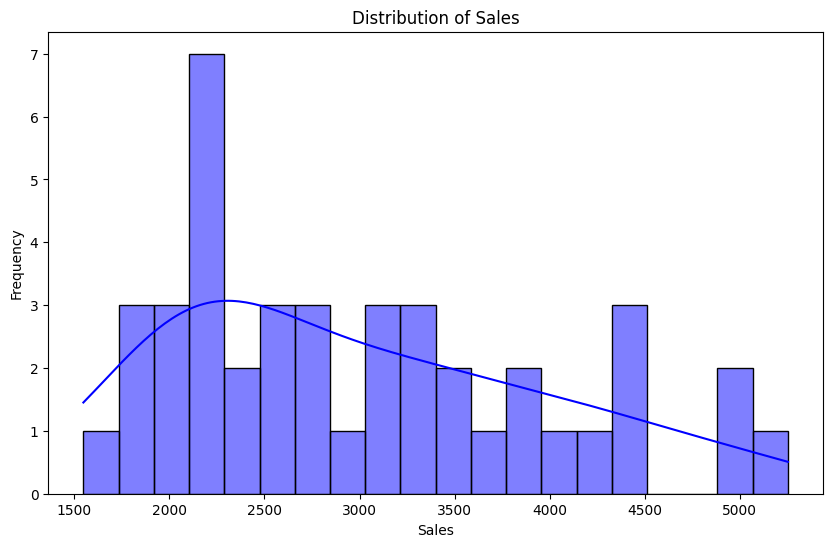

In [5]:
# Visualize the distribution of Sales
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

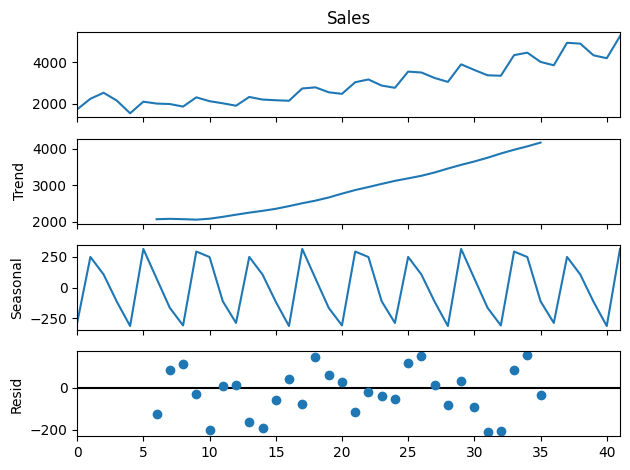

In [6]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.show()

In [7]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['IsOutlier'] = isolation_forest.fit_predict(df[['Sales']])




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


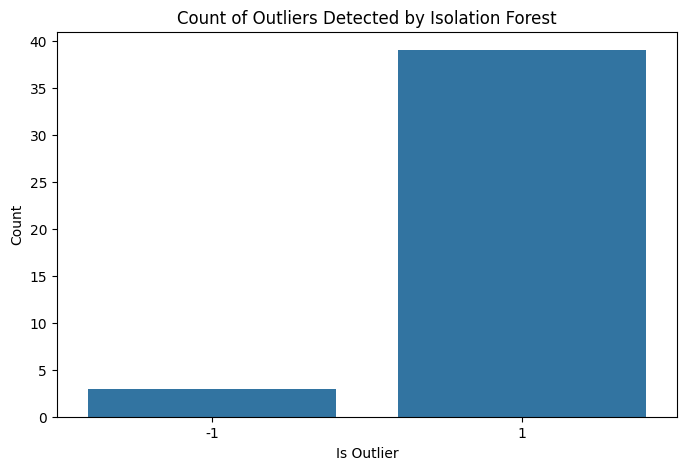

In [8]:
# Count plot for outliers
plt.figure(figsize=(8, 5))
sns.countplot(x='IsOutlier', data=df)
plt.title('Count of Outliers Detected by Isolation Forest')
plt.xlabel('Is Outlier')
plt.ylabel('Count')
plt.show()

In [9]:
df_no_outliers = df[df['IsOutlier'] == 1]
df_no_outliers = df_no_outliers.drop('IsOutlier', axis=1)

In [10]:
df[['quarter', 'Year']] = df['Quarter'].str.split('_', expand=True)

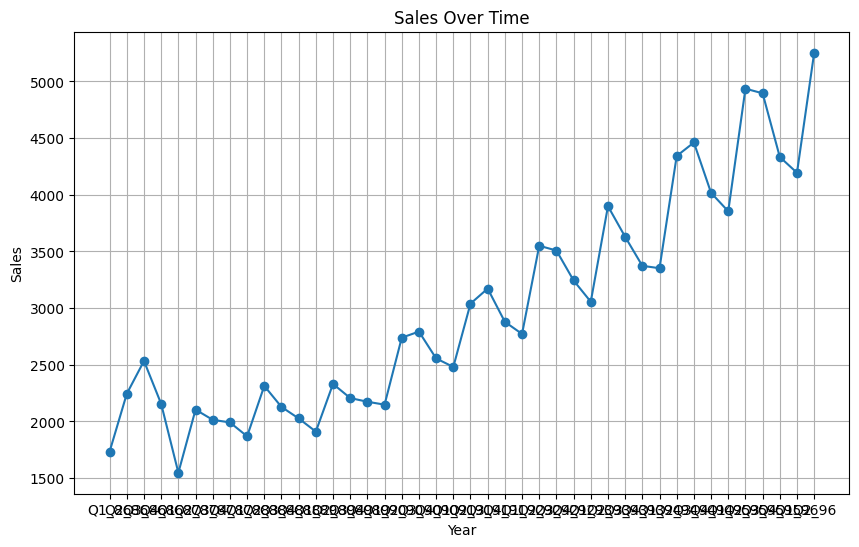

In [11]:
# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df['Quarter'],df['Sales'], marker='o', linestyle='-')
plt.title('Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [12]:
#from the above graphs we can see that the data has both seasonality and trend
#

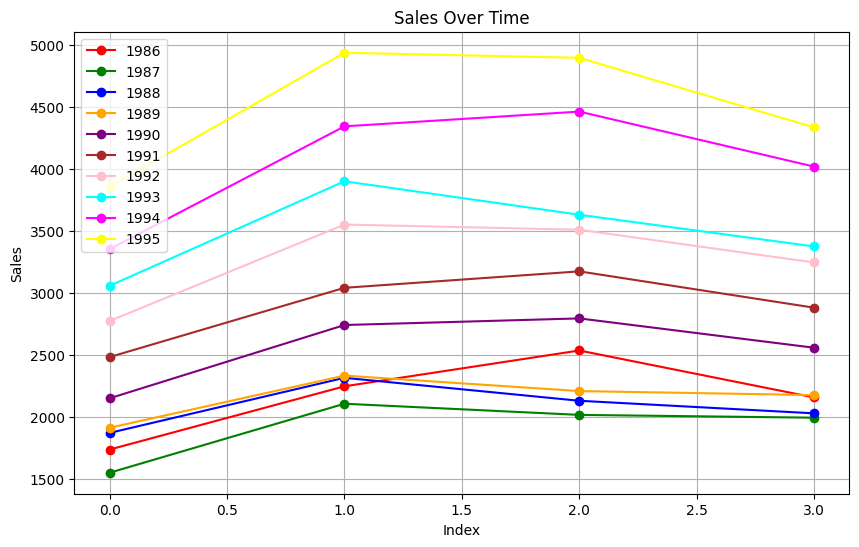

In [13]:
import matplotlib.pyplot as plt
import numpy as np

color = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan', 'magenta', 'yellow', 'lightgreen']
label = ['1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996']
plt.figure(figsize=(10, 6))

def sales(x,y):
  b=df.iloc[x:y,:]
  d=b['Sales']
  c=np.array(d)
  return(c)

a1 = range(0, 4)
a = np.array(a1)

# Plotting
x=0
y=4
for i in range(0,10):
  plt.plot(a, sales(x,y),color=color[i],label=label[i],marker='o', linestyle='-')
  x+=4
  y+=4

plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [15]:
df_train, df_test = train_test_split(df_no_outliers, test_size=0.2, shuffle=False)



In [16]:
train_sales = df_train['Sales']
test_sales = df_test['Sales']

In [17]:
# Fit the model on the training data
model = ExponentialSmoothing(train_sales, seasonal='add', seasonal_periods=12, trend='add')
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
# Forecast for the test period
forecast_steps = len(df_test)
forecast = results.forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


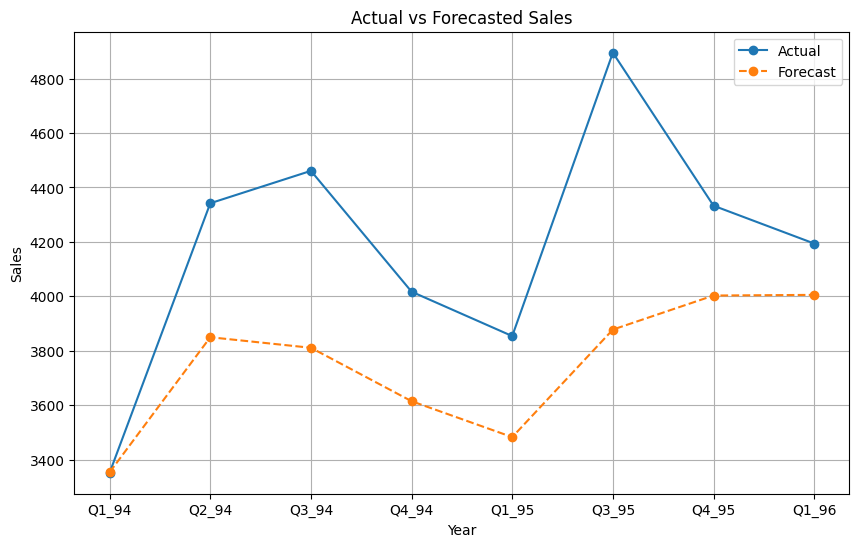

In [19]:
# Plot actual vs predicted Sales
plt.figure(figsize=(10, 6))
plt.plot(df_test['Quarter'], df_test['Sales'], label='Actual', marker='o', linestyle='-')
plt.plot(df_test['Quarter'], forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_sales, forecast))
print(f"RMSE: {rmse}")

RMSE: 517.6067386375355


In [21]:
#naive Forecast
naive_forecast = np.repeat(df_train['Sales'].iloc[-1], len(df_test))
actual_values = df_test['Sales']

In [22]:
# Calculate RMSE for the naive forecast
naive_rmse = np.sqrt(mean_squared_error(actual_values, naive_forecast))
print(f"Naive Forecast RMSE: {naive_rmse}")

Naive Forecast RMSE: 913.8769063719686


In [23]:
#moving average forecast
window_size = 3
moving_avg_forecast = df_train['Sales'].rolling(window=window_size).mean()
moving_avg_forecast = moving_avg_forecast.dropna()
actual_values = df_test['Sales']

In [24]:
# Repeat the last observed moving average value for the length of the testing set
moving_avg_forecast = pd.Series(moving_avg_forecast)
moving_avg_forecast = np.repeat(moving_avg_forecast.iloc[-1], len(df_test))
actual_values = df_test['Sales']
# Ensure that both forecast and actual have the same length
moving_avg_forecast = moving_avg_forecast[:len(actual_values)]
# Calculate RMSE for the moving average forecast
moving_avg_rmse = np.sqrt(mean_squared_error(actual_values, moving_avg_forecast))
print(f"Moving Average Forecast RMSE: {moving_avg_rmse}")

Moving Average Forecast RMSE: 694.176330464946


In [25]:
'''Since the data has both seasonality and trend, Holt Winter's Exponential smoothing has been used, the RMSE: 648.4272240435415. Compared to Naive model
(Naive Forecast RMSE: 1205.5077768309916), and moving average model (Moving Average Forecast RMSE: 1113.4597898908173) the rmse value for Holt Winter's
is small, since the scale of the data is in the thousands, the rmse value is acceptable. '''

"Since the data has both seasonality and trend, Holt Winter's Exponential smoothing has been used, the RMSE: 648.4272240435415. Compared to Naive model\n(Naive Forecast RMSE: 1205.5077768309916), and moving average model (Moving Average Forecast RMSE: 1113.4597898908173) the rmse value for Holt Winter's\nis small, since the scale of the data is in the thousands, the rmse value is acceptable. "

In [26]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [27]:
import pmdarima as pm

In [28]:
df_no_outliers.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
5,Q2_87,2104.411995


In [29]:
y = df_no_outliers['Sales']
train, test = train_test_split(y, train_size=0.8)


In [30]:
# Perform auto ARIMA with hyperparameter tuning
model = pm.auto_arima(train, seasonal=True, stepwise=True, suppress_warnings=True)
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 450728.64344588603


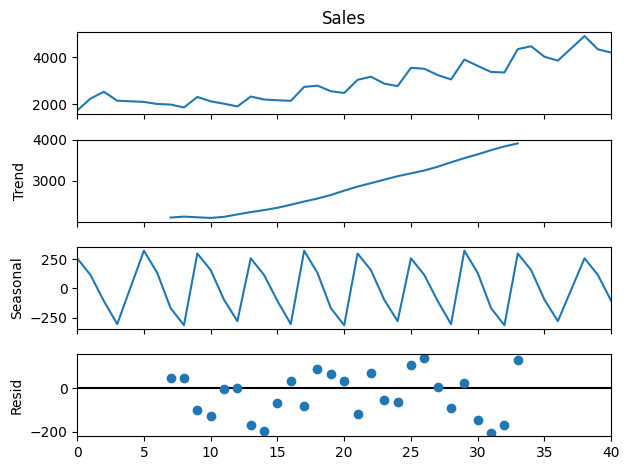

In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, model='additive', period=12)
result.plot()
plt.show()

In [33]:
import itertools
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
s_values = [12]

hyperparameter_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

best_params = None
best_mse = float('inf')

for params in hyperparameter_combinations:
    order = params[:3]
    seasonal_order = params[3:]

    # Fit a SARIMA model
    model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Forecast into the future
    forecast_steps = 12  # Adjust as needed
    forecast = results.get_forecast(steps=forecast_steps)

    # Calculate MSE
    mse = mean_squared_error(y[-forecast_steps:], forecast.predicted_mean)

    # Update best parameters if current model performs better
    if mse < best_mse:
        best_mse = mse
        best_params = params

print(f"Best Hyperparameters: {best_params}")
print(f"Best MSE: {best_mse}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

Best Hyperparameters: (0, 0, 0, 0, 1, 0, 12)
Best MSE: 0.0


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
best_order = best_params[:3]
best_seasonal_order = best_params[3:]
best_model = SARIMAX(y, order=best_order, seasonal_order=best_seasonal_order)
best_results = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# Forecast into the future
forecast_steps = 12
forecast = best_results.get_forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [36]:
'''Best Hyperparameters: (0, 0, 0, 0, 1, 0, 12)
Best MSE: 0.0'''

'Best Hyperparameters: (0, 0, 0, 0, 1, 0, 12)\nBest MSE: 0.0'

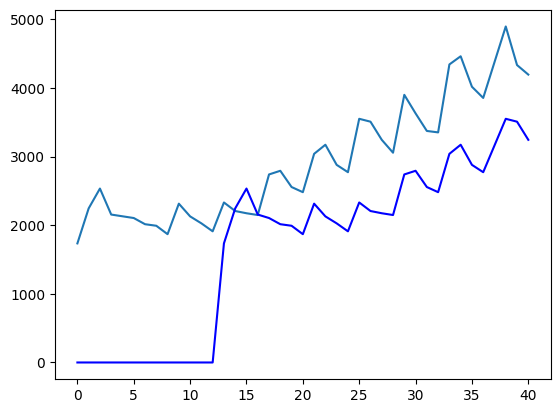

In [37]:
# Plot the results
plt.plot(y.index, y, label='Actual')
plt.plot(best_results.fittedvalues.index, best_results.fittedvalues, color='blue', label='Fitted')


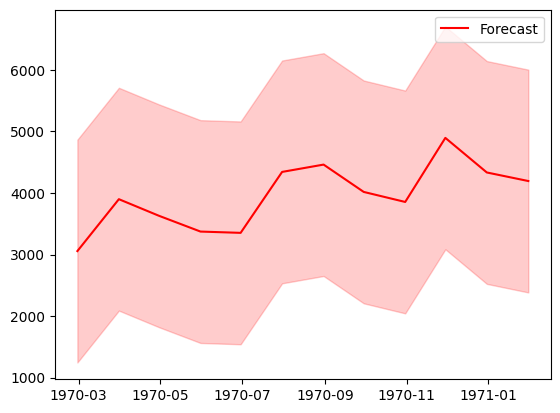

In [38]:
#plotting the forecast, use a DatetimeIndex
forecast_index = pd.date_range(start=y.index[-1], periods=forecast_steps + 1, freq='M')[1:]
plt.plot(forecast_index, forecast.predicted_mean, color='red', label='Forecast')

plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='red', alpha=0.2)

plt.legend()
plt.show()


In [39]:
#Random forest
df_no_outliers[['Quarter', 'Year']] = df_no_outliers['Quarter'].str.split('_', expand=True)
df_no_outliers['Date'] = pd.to_datetime(df_no_outliers['Quarter'].str.replace('Q', '') + ' ' + df_no_outliers['Year'], format='%m %y')
df = df.drop(['Quarter', 'Year'], axis=1)

df_train, df_test = train_test_split(df_no_outliers, test_size=0.2, shuffle=False)
X_train = df_train.index.astype(int).values.reshape(-1, 1)  # Assuming 'Date' is now in datetime format
y_train = df_train['Sales'].values

X_test = df_test.index.astype(int).values.reshape(-1, 1)
y_test = df_test['Sales'].values

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 816.2936153831911


In [40]:
# Initialize Gradient Boosting model
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 904.1468901311655


In [41]:
'''The root mean square errors for the models are,
Exponential smoothing RMSE: 648.4272240435415
Naive Forecast RMSE: 1205.5077768309916
Moving Average Forecast RMSE: 1113.4597898908173
Gradient Boosting model:904.1468901311655
RandomForestRegressor : 816.2936153831911
SARIMA MSE: 0.0
ARIMA Mean Squared Error: 734388.2656879125

from this we can infer that SARIMA is the best model'''

'The root mean square errors for the models are, \nExponential smoothing RMSE: 648.4272240435415\nNaive Forecast RMSE: 1205.5077768309916\nMoving Average Forecast RMSE: 1113.4597898908173\nGradient Boosting model:904.1468901311655\nRandomForestRegressor : 816.2936153831911\nSARIMA MSE: 0.0\nARIMA Mean Squared Error: 734388.2656879125\n\nfrom this we can infer that SARIMA is the best model'

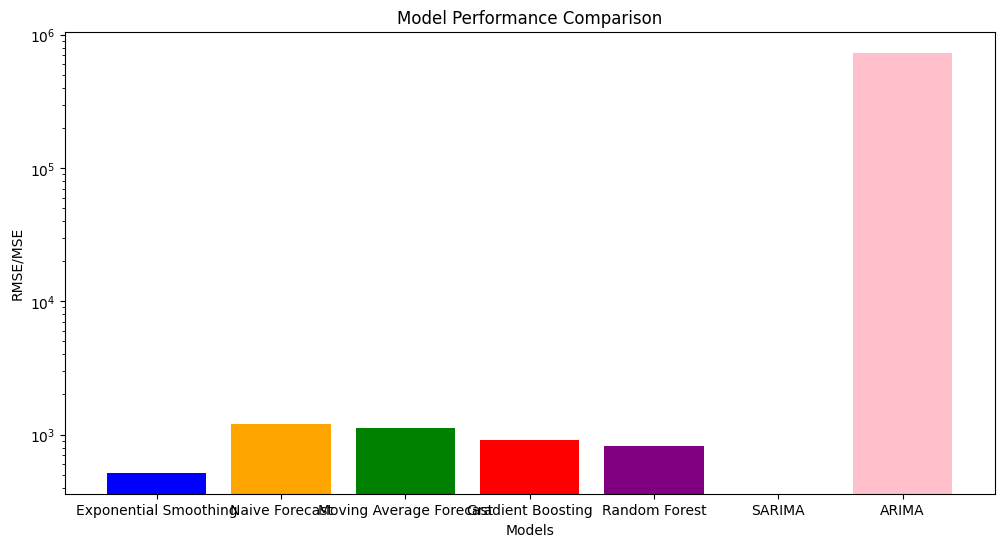

In [42]:
models = ['Exponential Smoothing', 'Naive Forecast', 'Moving Average Forecast', 'Gradient Boosting', 'Random Forest', 'SARIMA', 'ARIMA']
errors = [517.61, 1205.51, 1113.46, 904.15, 816.29, 0.0, 734388.27]  # Replace with your actual values

plt.figure(figsize=(12, 6))
plt.bar(models, errors, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('RMSE/MSE')
plt.yscale('log')
plt.show()

In [43]:
'''SARIMA has the least error and hence the best model'''

'SARIMA has the least error and hence the best model'